# PCA is unsupervised ml algo  used to reduce the dimensionality 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv("//Users//udayladdha//Desktop//DataSets//diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [5]:
df["smoking_history"].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [6]:
df["gender"].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
lb=LabelEncoder()

In [9]:
df["smoking_history"]=lb.fit_transform(df["smoking_history"])
df["gender"]=lb.fit_transform(df["gender"])

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc=StandardScaler()

In [12]:
x=df.iloc[:,0:8]
y=df.iloc[:,8]

In [13]:
x_train , x_test , y_train , y_test=train_test_split(x,y,test_size=0.2,random_state=21)

In [14]:
x_train.shape

(80000, 8)

In [15]:
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

In [16]:
pca=PCA(n_components=None)

In [17]:
x_train_trf=pca.fit_transform(x_train_scaled)
x_test_trf=pca.transform(x_test_scaled)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn=KNeighborsClassifier()

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
knn.fit(x_train_trf,y_train)
y_pred=knn.predict(x_test_trf)
accuracy_score=accuracy_score(y_test,y_pred)

In [22]:
print(accuracy_score*100,"%")

96.22 %


In [23]:
pca.components_  # eigen vectors

array([[-1.50865919e-02,  5.55033380e-01,  3.88713013e-01,
         3.05179001e-01,  3.34685070e-01,  4.52925613e-01,
         2.47299030e-01,  2.62993907e-01],
       [ 5.78642415e-01, -1.07931149e-01,  6.75167297e-02,
         3.59340166e-01, -4.50635110e-01, -2.25482154e-01,
         3.79482048e-01,  3.49169200e-01],
       [ 3.92281303e-01,  1.76649230e-01,  1.83964946e-01,
         4.27469245e-01, -5.55186765e-02,  6.27504403e-03,
        -5.47303781e-01, -5.43759362e-01],
       [-6.97139435e-01,  3.97678846e-02,  2.14784376e-01,
         4.93178048e-01, -2.98561298e-01, -3.65854075e-01,
         3.96884055e-03, -7.37594534e-03],
       [-1.31810907e-02,  6.70065011e-02, -7.90510472e-01,
         4.94345432e-01,  3.43756510e-01, -4.69491457e-02,
         2.74217356e-02,  7.01958851e-02],
       [-2.63315115e-03,  7.77838450e-04,  1.25147018e-03,
        -8.87446399e-03, -6.90161262e-02,  2.83135130e-02,
        -7.03224304e-01,  7.06981497e-01],
       [-1.42488916e-01,  1.612862

In [24]:
pca.explained_variance_  # eigen values

array([1.81895183, 1.14993438, 1.03905849, 0.89584611, 0.86071624,
       0.83164439, 0.80826563, 0.59568293])

In [25]:
(pca.explained_variance_ratio_)*100 # percentage of explained variance of a particular eigen values

array([22.73661366, 14.37400005, 12.98806872, 11.19793645, 10.75881849,
       10.39542499, 10.10319414,  7.4459435 ])

# Follwin is the way of fiding how many principle compnents we should choose (90% variance explained)

In [26]:
((np.cumsum(pca.explained_variance_ratio_))*100) # cumulative sum of all the eigen values

array([ 22.73661366,  37.1106137 ,  50.09868243,  61.29661887,
        72.05543737,  82.45086236,  92.5540565 , 100.        ])

In [27]:
import matplotlib.pyplot as plt

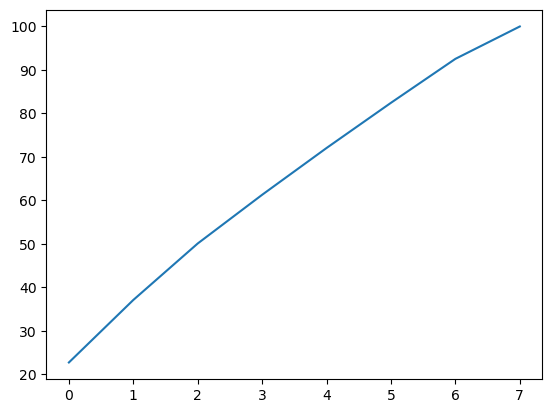

In [28]:
plt.plot(((np.cumsum(pca.explained_variance_ratio_))*100))

In [29]:
pca=PCA(n_components=6)
x_train_trf=pca.fit_transform(x_train_scaled)
x_test_trf=pca.transform(x_test_scaled)
knn.fit(x_train_trf,y_train)
y_pred=knn.predict(x_test_trf)


In [30]:
pca=PCA(n_components=6)

In [31]:
x_train_trf=pca.fit_transform(x_train_scaled)
x_test_trf=pca.transform(x_test_scaled)

In [32]:
knn.fit(x_train_trf,y_train)

KNeighborsClassifier()

In [33]:
y_pred=knn.predict(x_test_trf)

In [35]:
accuracy_score(y_test,y_pred)

TypeError: 'numpy.float64' object is not callable